In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sl
import statsmodels.api as sm
import random as rnd
from sklearn.linear_model import LinearRegression

In [19]:
def Y (x):
    return(8.3 * x  + rnd.randint(0,9))

In [20]:
Y(1)

12.3

In [254]:
df = pd.read_csv('Electric_Vehicle_Population_Size_History_By_County.csv')

In [255]:
df2= df.sort_values(by=["Percent Electric Vehicles"], ascending=[False]).tail(10000)

In [256]:
display(df2)

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
18147,May 31 2018,Gwinnett,GA,Passenger,0,1,1,85,86,1.16
6299,October 31 2023,Pulaski,MO,Passenger,1,0,1,85,86,1.16
5082,July 31 2019,Honolulu,HI,Passenger,3,3,6,510,516,1.16
8466,July 31 2021,Lake,IL,Passenger,2,0,2,170,172,1.16
13383,June 30 2023,Dallas,TX,Passenger,1,0,1,85,86,1.16
...,...,...,...,...,...,...,...,...,...,...
12105,September 30 2020,Chelan,WA,Truck,0,0,0,"22,718","22,718",0.00
2898,July 31 2021,Snohomish,WA,Truck,1,0,1,"126,166","126,167",0.00
2897,April 30 2019,Wahkiakum,WA,Truck,0,0,0,"1,733","1,733",0.00
2896,December 31 2017,Franklin,WA,Truck,0,0,0,"18,489","18,489",0.00


In [257]:
df2 =pd.DataFrame(df2)

In [258]:
x1 = df2["Percent Electric Vehicles"]
y1 = pd.DataFrame([Y(i) for i in range (10000)])

In [259]:
x = x1.to_numpy()
y = y1.to_numpy()

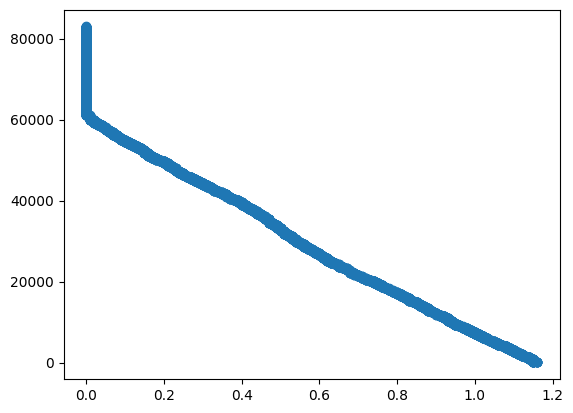

In [260]:
plt.scatter(x,y)

In [261]:
model = LinearRegression()

In [262]:
x = x.reshape((-1, 1))

In [325]:
model = LinearRegression().fit(x, y)
sq = model.score(x,y)

In [264]:
print('coefficient of determination:', sq)

coefficient of determination: 0.9515368326968139


In [265]:
print('b0:', model.intercept_)
print('b1:', model.coef_[0])

b0: [66840.92054677]
b1: [-62318.63798886]


In [266]:
def Yr (x):
    return(model.intercept_ + model.coef_[0] * x)

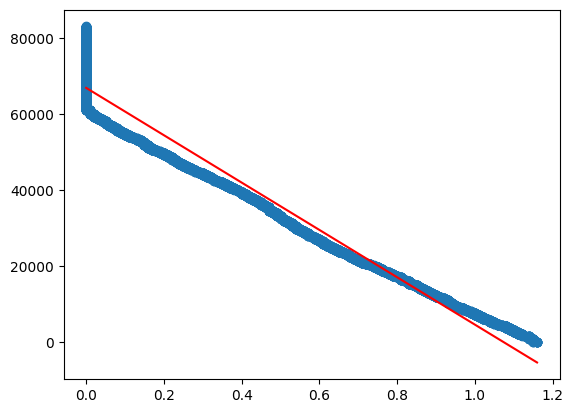

In [267]:
plt.scatter(x,y)
plt.plot(x,Yr(x), color='red')

In [326]:
xp = df2["Percent Electric Vehicles"].head(1000).to_numpy()
xp = xp.reshape((-1, 1))
y_pred = model.predict(xp)
print('predicted response:', y_pred, sep='\n')

predicted response:
[[-5448.69952031]
 [-5448.69952031]
 [-5448.69952031]
 [-5448.69952031]
 [-5448.69952031]
 [-5448.69952031]
 [-5448.69952031]
 [-4825.51314042]
 [-4825.51314042]
 [-4825.51314042]
 [-4825.51314042]
 [-4825.51314042]
 [-4825.51314042]
 [-4825.51314042]
 [-4825.51314042]
 [-4825.51314042]
 [-4825.51314042]
 [-4825.51314042]
 [-4825.51314042]
 [-4825.51314042]
 [-4825.51314042]
 [-4825.51314042]
 [-4825.51314042]
 [-4825.51314042]
 [-4825.51314042]
 [-4825.51314042]
 [-4825.51314042]
 [-4825.51314042]
 [-4825.51314042]
 [-4825.51314042]
 [-4825.51314042]
 [-4825.51314042]
 [-4825.51314042]
 [-4825.51314042]
 [-4825.51314042]
 [-4825.51314042]
 [-4825.51314042]
 [-4825.51314042]
 [-4825.51314042]
 [-4825.51314042]
 [-4825.51314042]
 [-4825.51314042]
 [-4825.51314042]
 [-4825.51314042]
 [-4825.51314042]
 [-4825.51314042]
 [-4825.51314042]
 [-4825.51314042]
 [-4825.51314042]
 [-4825.51314042]
 [-4825.51314042]
 [-4825.51314042]
 [-4825.51314042]
 [-4825.51314042]
 [-4825.

In [333]:
model2 = sm.OLS(y,x).fit()
print(model2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.094
Model:                            OLS   Adj. R-squared (uncentered):              0.093
Method:                 Least Squares   F-statistic:                              1032.
Date:                Fri, 19 Apr 2024   Prob (F-statistic):                   1.15e-215
Time:                        13:10:32   Log-Likelihood:                     -1.2147e+05
No. Observations:               10000   AIC:                                  2.429e+05
Df Residuals:                    9999   BIC:                                  2.430e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [334]:
def Yr2 (x):
     return(model.intercept_ + model.coef_[0] * x)

In [335]:
y_pred2 = model2.predict(xp)
print(y_pred2)

[30741.83997927 30741.83997927 30741.83997927 30741.83997927
 30741.83997927 30741.83997927 30741.83997927 30476.82411738
 30476.82411738 30476.82411738 30476.82411738 30476.82411738
 30476.82411738 30476.82411738 30476.82411738 30476.82411738
 30476.82411738 30476.82411738 30476.82411738 30476.82411738
 30476.82411738 30476.82411738 30476.82411738 30476.82411738
 30476.82411738 30476.82411738 30476.82411738 30476.82411738
 30476.82411738 30476.82411738 30476.82411738 30476.82411738
 30476.82411738 30476.82411738 30476.82411738 30476.82411738
 30476.82411738 30476.82411738 30476.82411738 30476.82411738
 30476.82411738 30476.82411738 30476.82411738 30476.82411738
 30476.82411738 30476.82411738 30476.82411738 30476.82411738
 30476.82411738 30476.82411738 30476.82411738 30476.82411738
 30476.82411738 30476.82411738 30476.82411738 30476.82411738
 30476.82411738 30476.82411738 30476.82411738 30476.82411738
 30476.82411738 30476.82411738 30476.82411738 30476.82411738
 30476.82411738 30476.82

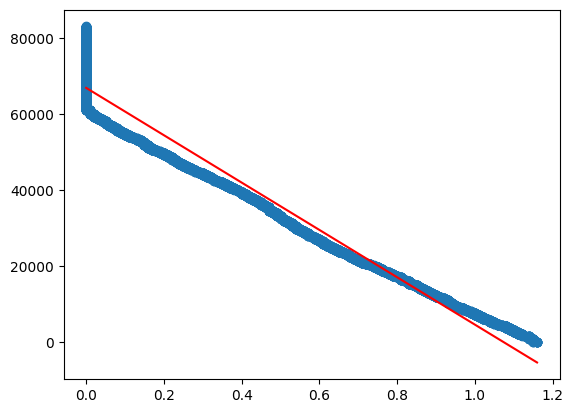

: 

In [336]:
plt.scatter(x,y)
plt.plot(x,Yr2(x), color='red')